# Data Preparation & Analysis

**Objective**: Load, validate, and analyze the raw Vietnamese FDI stock data before graph processing.

**Data Source**: `data/raw/values.csv` (98 stocks × 773 trading days × 9 features)
**Graph Data**: `data/raw/adj.npy` (98×98 correlation-based adjacency matrix)

## 1. Load Data

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Load raw data (processed artifacts are generated in notebook 2)
values_path = Path('../data/raw/values.csv')
adj_path = Path('../data/raw/adj.npy')
values = pd.read_csv(values_path, index_col=[0, 1])
adj = np.load(adj_path)

sns.set_style("whitegrid")

# Data quality metrics
print("=" * 70)
print("DATA QUALITY REPORT")
print("=" * 70)

# Structure
print("\n[STRUCTURE]")
print(f"  Total records: {values.shape[0]:,}")
print(f"  Features: {values.shape[1]}")
print(f"  Unique stocks: {values.index.get_level_values('Symbol').nunique()}")
print(f"  Trading days: {values.index.get_level_values('Date').nunique()}")

# Missing values
print("\n[DATA INTEGRITY]")
null_count = values.isnull().sum().sum()
print(f"  Missing values: {null_count}")
if null_count == 0:
    print("  ✓ Complete dataset, no NaN values")

# Feature columns
print("\n[FEATURES]")
for i, col in enumerate(values.columns, 1):
    print(f"  {i}. {col}")

# Date range
dates = pd.to_datetime(values.index.get_level_values('Date'))
print("\n[DATE RANGE]")
print(f"  Start: {dates.min().date()}")
print(f"  End: {dates.max().date()}")
print(f"  Duration: {(dates.max() - dates.min()).days} days")

print("\n" + "=" * 70)

DATA QUALITY REPORT

[STRUCTURE]
  Total records: 75,754
  Features: 9
  Unique stocks: 98
  Trading days: 773

[DATA INTEGRITY]
  Missing values: 0
  ✓ Complete dataset, no NaN values

[FEATURES]
  1. Close
  2. NormClose
  3. DailyLogReturn
  4. ALR1W
  5. ALR2W
  6. ALR1M
  7. ALR2M
  8. RSI
  9. MACD

[DATE RANGE]
  Start: 2022-01-03
  End: 2024-12-31
  Duration: 1093 days



## 2. Data Quality Validation

In [11]:
import pandas as pd
import numpy as np
from datetime import datetime

# Example: Create sample data for FDI enterprises in Vietnam
# In practice, you would load real data from:
# - CSV files: pd.read_csv('path/to/data.csv')
# - APIs: yfinance, VnEX
# - Databases

def generate_sample_stock_data(num_stocks=20, num_days=252*2):
    """
    Generate sample stock price data for demonstration
    num_stocks: number of FDI enterprises
    num_days: number of trading days (~2 years)
    """
    np.random.seed(42)
    
    dates = pd.date_range(end=datetime.now(), periods=num_days, freq='D')
    stocks = [f'FDI_Stock_{i:02d}' for i in range(1, num_stocks + 1)]
    
    data_dict = {'Date': []}
    
    for stock in stocks:
        # Generate realistic stock prices using geometric Brownian motion
        np.random.seed(hash(stock) % 2**32)
        prices = 100  # Initial price
        price_series = [prices]
        
        for _ in range(num_days - 1):
            # Drift and volatility parameters
            drift = 0.0001
            volatility = 0.02
            
            # Daily return
            daily_return = np.random.normal(drift, volatility)
            prices = prices * (1 + daily_return)
            price_series.append(prices)
        
        data_dict[stock] = price_series
    
    data_dict['Date'] = dates
    return pd.DataFrame(data_dict)

# Generate sample data
stock_data = generate_sample_stock_data(num_stocks=15, num_days=252*2)
print(f"Data shape: {stock_data.shape}")
print("\nFirst few rows:")
print(stock_data.head())
print("\nData info:")
print(stock_data.info())


Data shape: (504, 16)

First few rows:
                        Date  FDI_Stock_01  FDI_Stock_02  FDI_Stock_03  \
0 2024-09-04 00:45:12.367281    100.000000    100.000000    100.000000   
1 2024-09-05 00:45:12.367281    100.611195    100.157860    104.516279   
2 2024-09-06 00:45:12.367281    103.743833    101.167617    103.591142   
3 2024-09-07 00:45:12.367281    105.159058     99.040096    104.318573   
4 2024-09-08 00:45:12.367281    104.443367     95.568106     99.229078   

   FDI_Stock_04  FDI_Stock_05  FDI_Stock_06  FDI_Stock_07  FDI_Stock_08  \
0    100.000000    100.000000    100.000000    100.000000    100.000000   
1     96.925398     99.187939     99.495448     98.611328    103.253606   
2     95.498402     99.721245     99.243543     97.567610    104.793750   
3     93.951773    100.366443     94.752200    100.469620    103.932253   
4     93.487347    101.448228     97.283772    102.724761    104.898305   

   FDI_Stock_09  FDI_Stock_10  FDI_Stock_11  FDI_Stock_12  FDI_St

## 3. Feature Statistics

In [12]:
import pandas as pd
import numpy as np

# Ensure data is loaded
if 'values' not in globals():
    values = pd.read_csv('../data/processed/values.csv', index_col=[0, 1])

print("\nFeature Statistics:")
print("-" * 70)
stats = values.describe().T
print(stats[['mean', 'std', 'min', 'max']].round(4))


Feature Statistics:
----------------------------------------------------------------------
                    mean      std      min       max
Close           132.0833  70.1502  15.2281  667.6914
NormClose        -0.0000   0.9994  -2.9001    3.8530
DailyLogReturn   -0.0001   0.0201  -0.1004    0.1045
ALR1W            -0.0283   2.2599 -10.1637   10.9149
ALR2W            -0.0258   1.6068  -6.6930    6.5022
ALR1M            -0.0247   1.1103  -4.9919    4.4827
ALR2M            -0.0270   0.7863  -3.4142    2.8196
RSI              49.7744  16.5587   0.0000   99.8166
MACD              0.0989   3.3857 -16.8273   34.3861


## 4. Feature Distributions

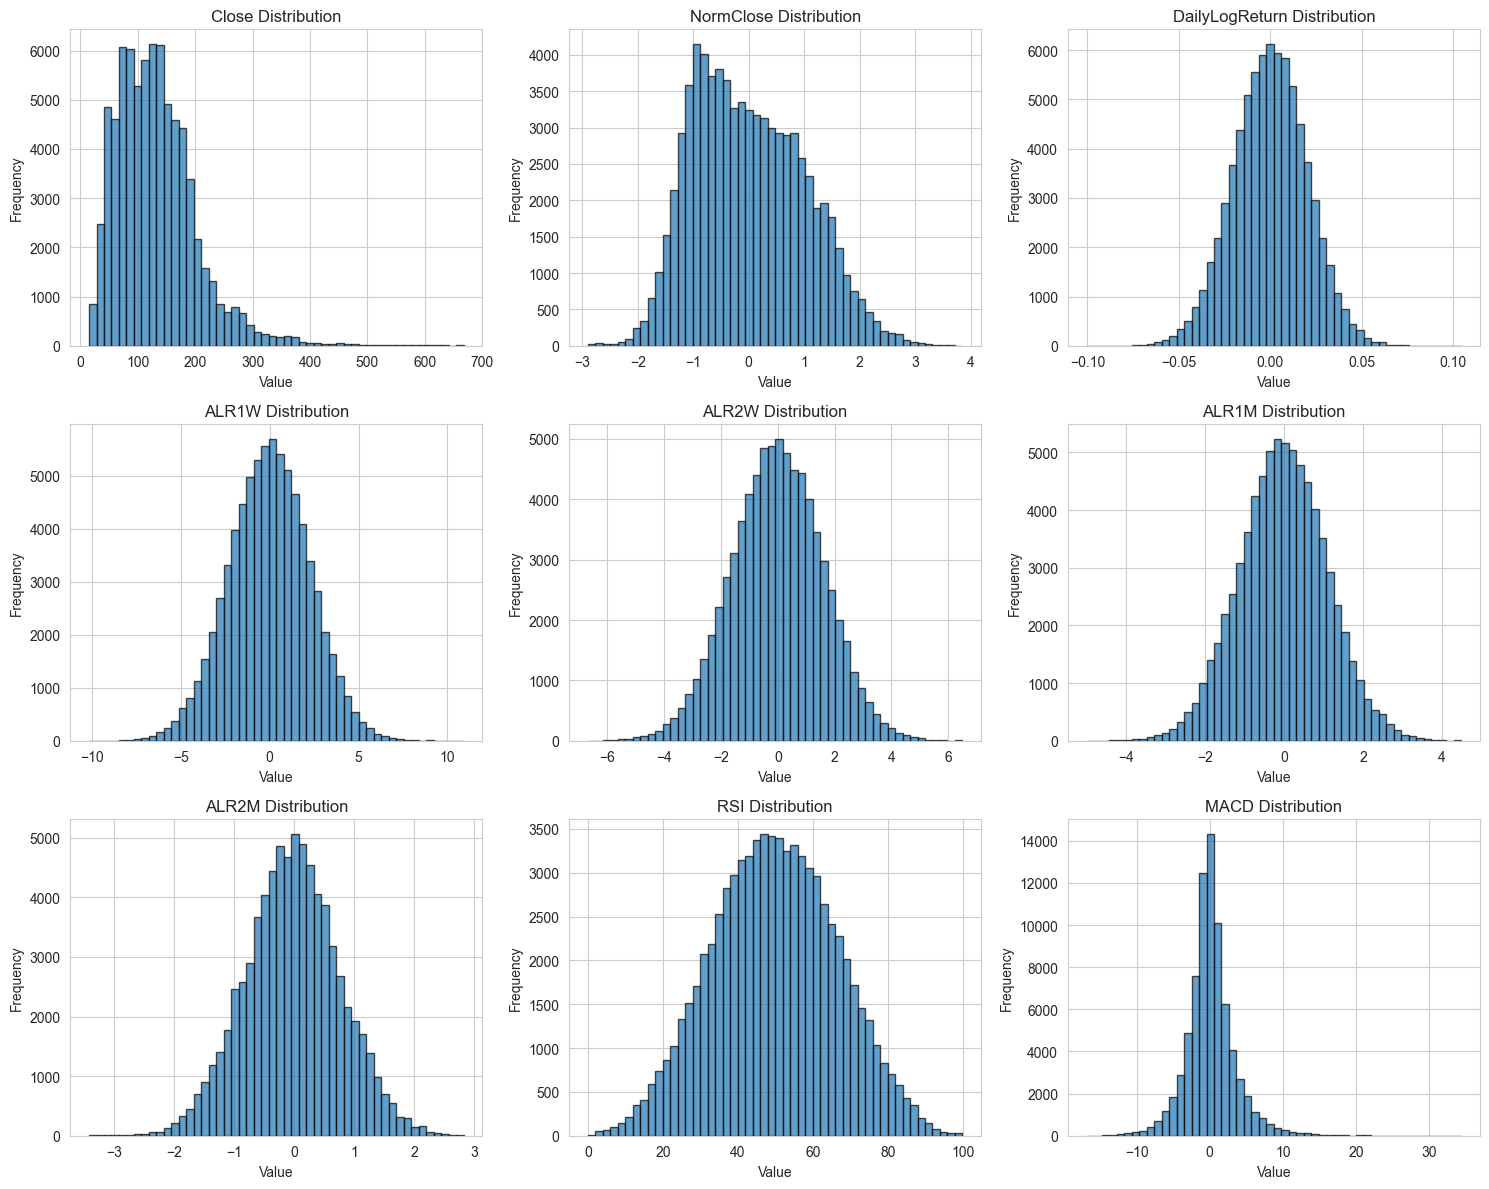

✓ Distribution plots saved


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Ensure data is loaded
if 'values' not in globals():
    values = pd.read_csv('../data/processed/values.csv', index_col=[0, 1])

fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.flatten()

for idx, col in enumerate(values.columns):
    axes[idx].hist(values[col].dropna(), bins=50, edgecolor='black', alpha=0.7)
    axes[idx].set_title(f'{col} Distribution')
    axes[idx].set_xlabel('Value')
    axes[idx].set_ylabel('Frequency')

plt.tight_layout()
plt.savefig('../data/analysis/feature_distributions.png', dpi=100)
plt.show()

print("✓ Distribution plots saved")

## 5. Stock-Wise Analysis

In [14]:
import pandas as pd

# Ensure data is loaded
if 'values' not in globals():
    values = pd.read_csv('../data/processed/values.csv', index_col=[0, 1])

# Stock-wise statistics
stock_stats = values.groupby(level='Symbol')[['Close', 'DailyLogReturn', 'RSI']].agg(['mean', 'std', 'min', 'max'])
print("\nTop 10 Stocks by Average Price:")
print(values.groupby(level='Symbol')['Close'].mean().sort_values(ascending=False).head(10))

print("\nTop 10 Stocks by Daily Return Volatility:")
print(values.groupby(level='Symbol')['DailyLogReturn'].std().sort_values(ascending=False).head(10))


Top 10 Stocks by Average Price:
Symbol
KDC    332.598702
BID    297.512731
TS4    291.295535
VJC    278.593664
PGV    267.307293
STB    221.807576
HVN    219.371594
VCB    215.864312
PVS    214.553957
GVR    202.560120
Name: Close, dtype: float64

Top 10 Stocks by Daily Return Volatility:
Symbol
PHR    0.021329
BAF    0.021246
DGW    0.021199
CTD    0.021060
HDB    0.020995
ANV    0.020951
BCM    0.020930
VCI    0.020920
VGC    0.020920
VND    0.020913
Name: DailyLogReturn, dtype: float64


## 6. Adjacency Matrix Analysis


[ADJACENCY MATRIX ANALYSIS]
Shape: (98, 98)
Non-zero edges: 52
Density: 0.005414
Symmetric: True

Degree Distribution:
  Mean degree: 0.53
  Max degree: 3
  Min degree: 0


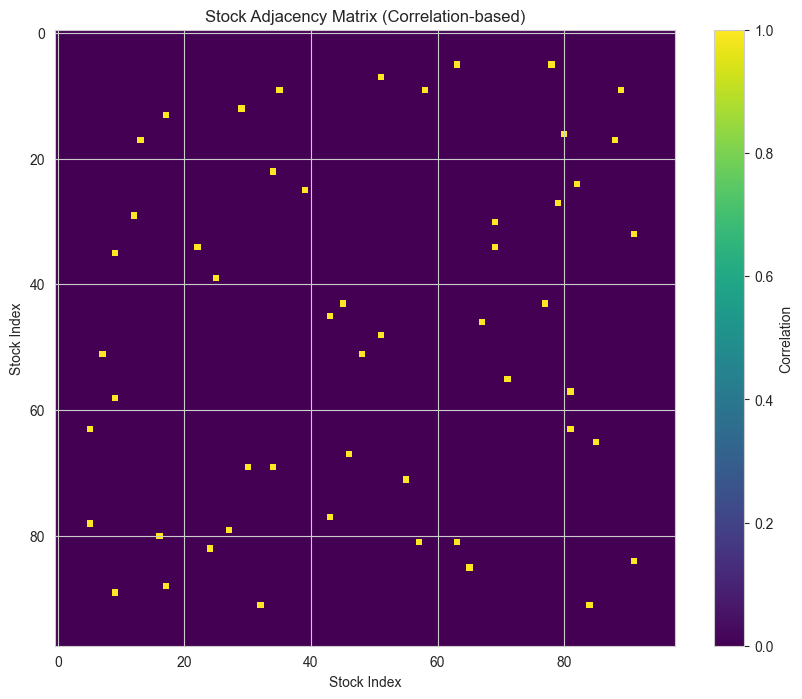


✓ Adjacency matrix visualization saved


In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Ensure adjacency is loaded
if 'adj' not in globals():
    adj = np.load('../data/processed/adj.npy')

# Adjacency matrix statistics
print("\n[ADJACENCY MATRIX ANALYSIS]")
print(f"Shape: {adj.shape}")
print(f"Non-zero edges: {np.count_nonzero(adj)}")
print(f"Density: {np.count_nonzero(adj) / (adj.shape[0] * adj.shape[1]):.6f}")
print(f"Symmetric: {np.allclose(adj, adj.T)}")

# Degree distribution
degrees = adj.sum(axis=1)
print(f"\nDegree Distribution:")
print(f"  Mean degree: {degrees.mean():.2f}")
print(f"  Max degree: {int(degrees.max())}")
print(f"  Min degree: {int(degrees.min())}")

# Visualize adjacency matrix
fig, ax = plt.subplots(figsize=(10, 8))
im = ax.imshow(adj, cmap='viridis', aspect='auto')
ax.set_title('Stock Adjacency Matrix (Correlation-based)')
ax.set_xlabel('Stock Index')
ax.set_ylabel('Stock Index')
plt.colorbar(im, ax=ax, label='Correlation')
plt.savefig('../data/analysis/adjacency_matrix.png', dpi=100, bbox_inches='tight')
plt.show()

print("\n✓ Adjacency matrix visualization saved")

## 7. Time Series Visualization

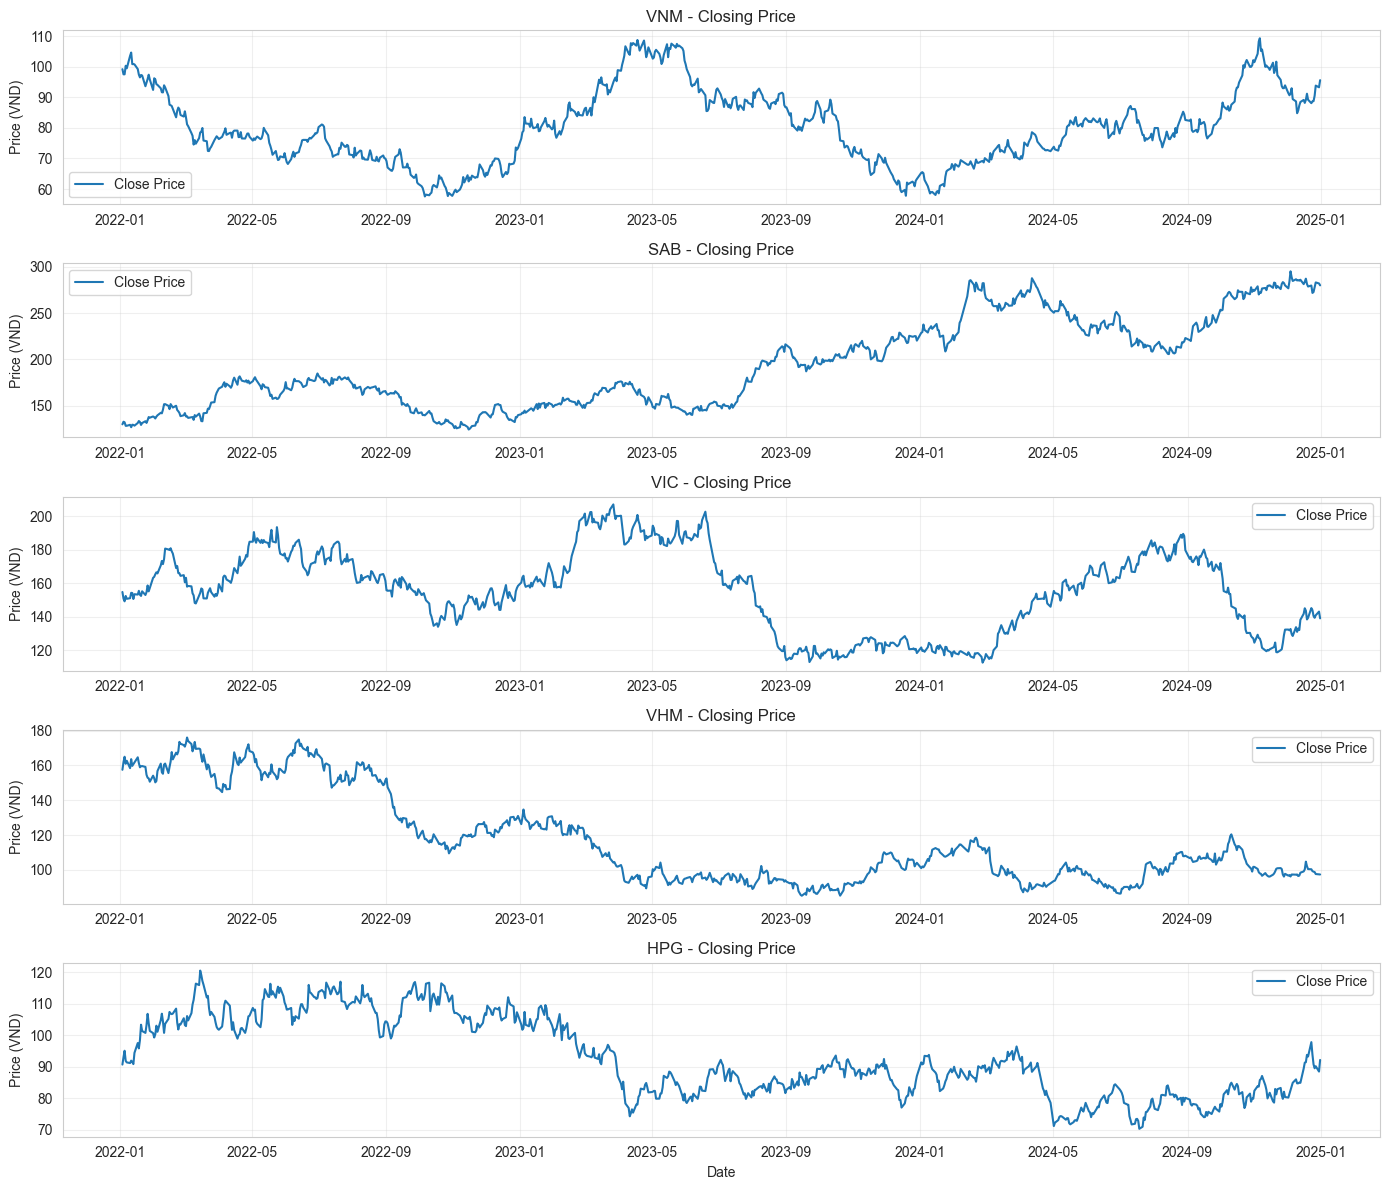

✓ Time series visualization saved


In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure data is loaded
if 'values' not in globals():
    values = pd.read_csv('../data/processed/values.csv', index_col=[0, 1])

# Plot key stocks over time
top_stocks = ['VNM', 'SAB', 'VIC', 'VHM', 'HPG']
fig, axes = plt.subplots(5, 1, figsize=(14, 12))

for idx, stock in enumerate(top_stocks):
    stock_data = values.loc[stock]
    axes[idx].plot(pd.to_datetime(stock_data.index), stock_data['Close'], linewidth=1.5, label='Close Price')
    axes[idx].set_title(f'{stock} - Closing Price')
    axes[idx].set_ylabel('Price (VND)')
    axes[idx].grid(True, alpha=0.3)
    axes[idx].legend()

axes[-1].set_xlabel('Date')
plt.tight_layout()
plt.savefig('../data/analysis/timeseries_topstocks.png', dpi=100)
plt.show()

print("✓ Time series visualization saved")

## 8. Data Export for Analysis

In [17]:
# Create feature matrices for analysis
import os
import pandas as pd

# Ensure data is loaded
if 'values' not in globals():
    values = pd.read_csv('../data/processed/values.csv', index_col=[0, 1])

output_dir = '../data/features'
os.makedirs(output_dir, exist_ok=True)

# Unstack to create stock × date matrix for each feature
for feature in ['Close', 'DailyLogReturn', 'RSI', 'MACD']:
    feature_matrix = values[feature].unstack(level='Symbol')
    output_file = f'{output_dir}/{feature.lower()}_matrix.csv'
    feature_matrix.to_csv(output_file)
    print(f"✓ Saved {feature} matrix: {feature_matrix.shape}")

# Save ticker list
ticker_list = values.index.get_level_values('Symbol').unique()
ticker_df = pd.DataFrame({'ticker': ticker_list})
ticker_df.to_csv(f'{output_dir}/tickers.csv', index=False)
print(f"\n✓ Saved {len(ticker_list)} tickers to features/tickers.csv")

print("\n" + "=" * 70)
print("Data preparation complete! Ready for analysis.")
print("=" * 70)

✓ Saved Close matrix: (773, 98)
✓ Saved DailyLogReturn matrix: (773, 98)
✓ Saved RSI matrix: (773, 98)
✓ Saved MACD matrix: (773, 98)

✓ Saved 98 tickers to features/tickers.csv

Data preparation complete! Ready for analysis.
